<a href="https://colab.research.google.com/github/RishitaChawla/Forest_Fire_Prediction_Model/blob/main/MLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
print(cv2.__version__)

4.11.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score,
                            recall_score, f1_score,
                            confusion_matrix, ConfusionMatrixDisplay,
                            classification_report)


In [ ]:
# Configuration
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data
file_path = "/content/drive/MyDrive/Algerian_forest_fires_dataset.csv"
df = pd.read_csv(file_path)

In [ ]:
# Clean column names
df.columns = df.columns.str.strip()

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       nan, 'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [ ]:
# Add Region column (1 for first 122 rows, 2 for rest)
df['Region'] = np.where(df.index < 122, 1, 2)

# Handle missing values
df = df.dropna().reset_index(drop=True)

# Clean 'Classes' column
df['Classes'] = df['Classes'].str.strip()
df = df[df['Classes'].isin(['fire', 'not fire'])]

In [ ]:
# Convert data types
df1 = df.copy() # copy into new dataset
df1['Temperature'] = pd.to_numeric(df1['Temperature'], errors='coerce')
df1 = df1.dropna().reset_index(drop=True)

type_conversions = {
    'RH': np.int64, 'Temperature': np.int64,
    'Ws': np.int64, 'Rain': np.float64,
    'FFMC': np.float64, 'DMC': np.float64,
    'DC': np.float64, 'ISI': np.float64,
    'BUI': np.float64, 'FWI': np.float64
}
df1 = df1.astype(type_conversions)

In [ ]:
# Save cleaned data
df1.to_csv('forest_fires.csv', index=False)

In [ ]:
# Basic info
print("Data Shape:", df1.shape)
print("\nData Types:")
print(df1.dtypes)
print("\nMissing Values:")
print(df1.isnull().sum())
print("\nClass Distribution:")
print(df1['Classes'].value_counts())

print("\nSimplified Class Categories:")
print(df1['Classes'].unique())

Data Shape: (243, 15)

Data Types:
day             object
month           object
year            object
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

Missing Values:
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

Class Distribution:
Classes
fire        137
not fire    106
Name: count, dtype: int64

Simplified Class Categories:
['not fire' 'fire']


In [ ]:
# Numeric and categorical columns
numeric_col = [col for col in df1.columns if df1[col].dtype != 'object']
object_col = [col for col in df1.columns if df1[col].dtype == 'object']
print("Numeric Columns:", numeric_col)
print("Object Columns:", object_col)

Numeric Columns: ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']
Object Columns: ['day', 'month', 'year', 'Classes']


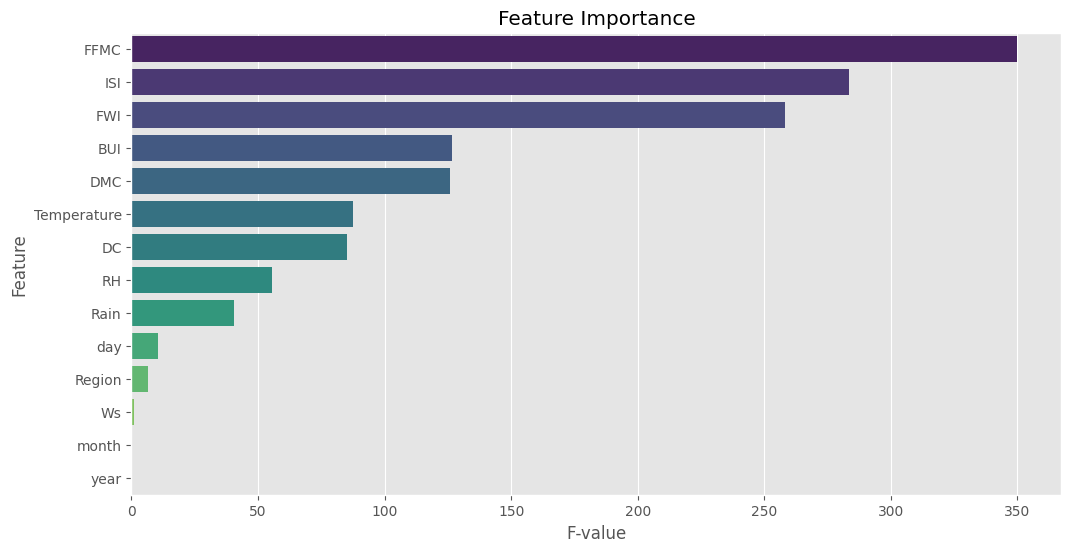

In [ ]:
# prompt: Add feature selection bar gprah here, not correlation heatmap for model training, with transition color. also do logistic regression

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Example:
X = df1.drop('Classes', axis=1)
y = df1['Classes']

# Feature selection using SelectKBest (ANOVA F-value)
selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]

# Create a feature importance plot
feature_importances = pd.Series(selector.scores_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('F-value')
plt.ylabel('Feature')
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)



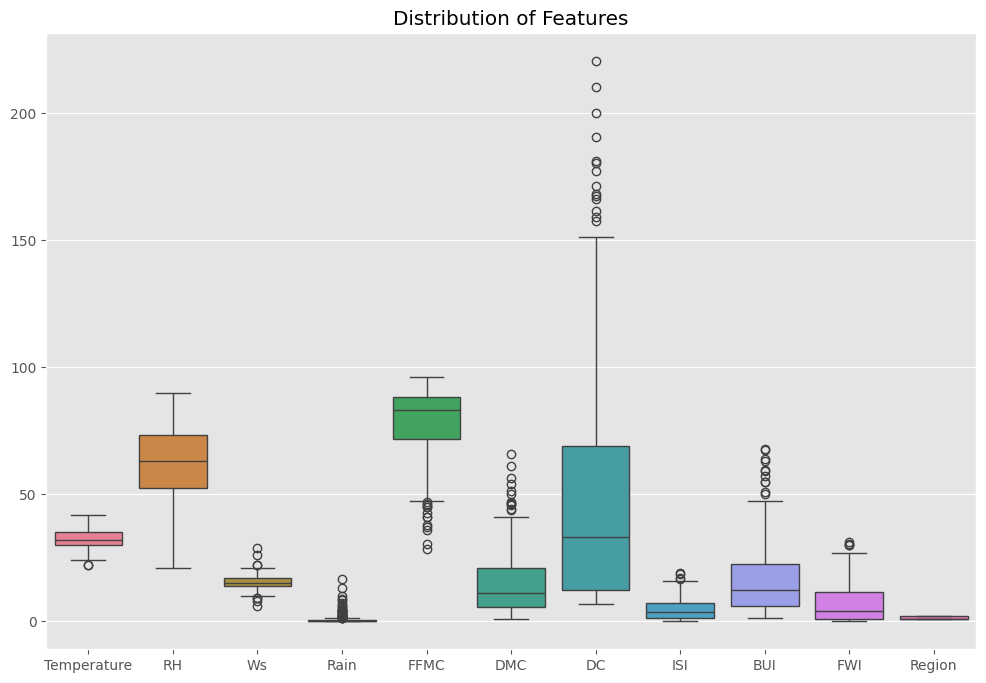

In [ ]:
# Boxplot of numeric features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1[numeric_col])
plt.title('Distribution of Features')
plt.show()

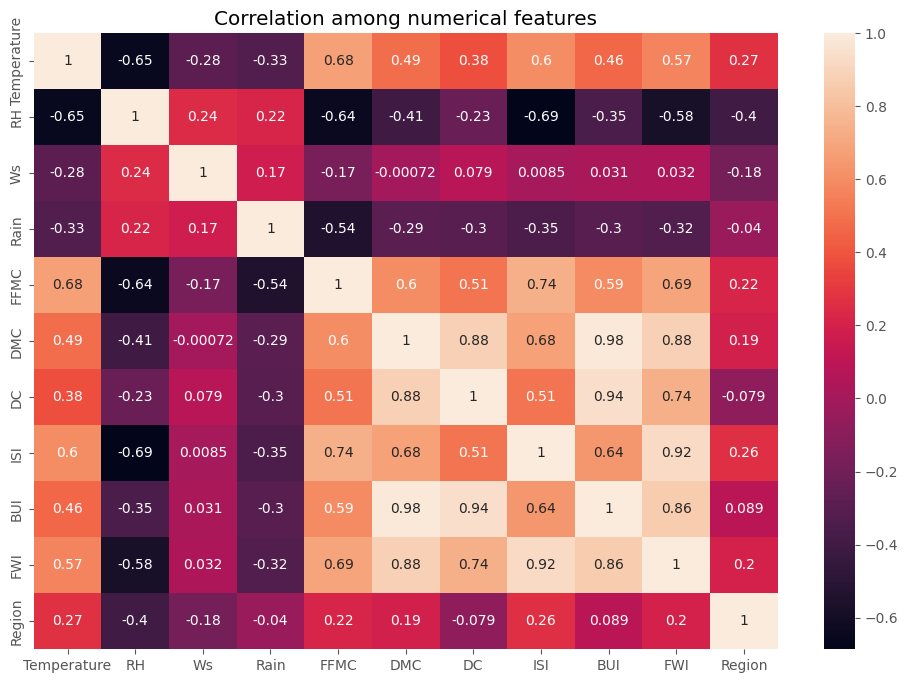

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
numeric_df1 = df1.select_dtypes(include=np.number)
sns.heatmap(numeric_df1.corr(), annot=True)
plt.title('Correlation among numerical features')
plt.show()

In [ ]:
# Prepare data for modeling
X = df1.drop(['Classes', 'day', 'month', 'year'], axis=1)
y = df1['Classes']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

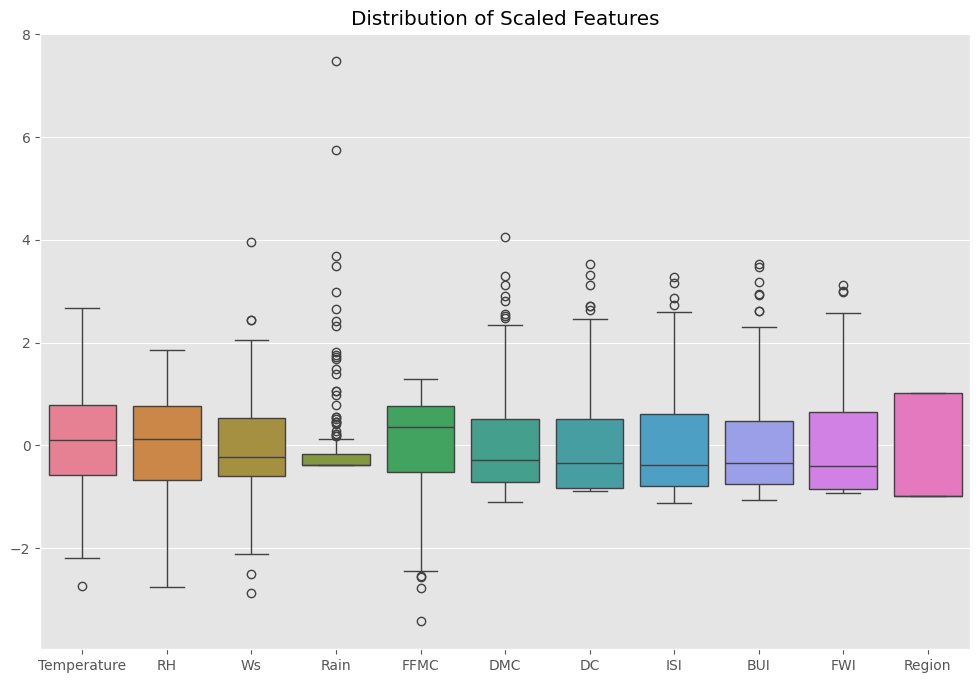

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=pd.DataFrame(X_train_scaled, columns=X_train.columns)) # Use scaled data
plt.title('Distribution of Scaled Features')
plt.show()


In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression(penalty=None, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)


In [ ]:
# Evaluation metrics
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label='fire'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label='fire'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='fire'):.4f}")

Logistic Regression Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


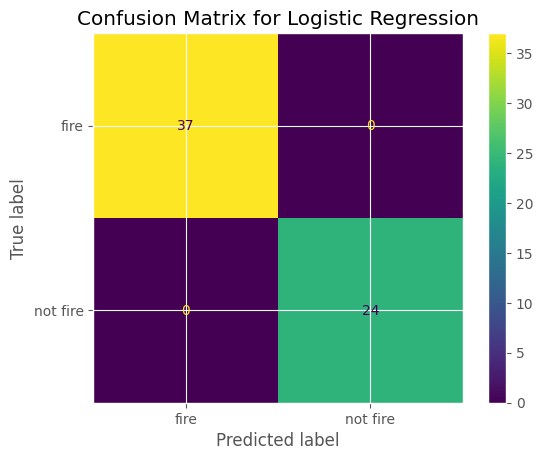


Classification Report:
              precision    recall  f1-score   support

        fire       1.00      1.00      1.00        37
    not fire       1.00      1.00      1.00        24

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=log_reg.classes_)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

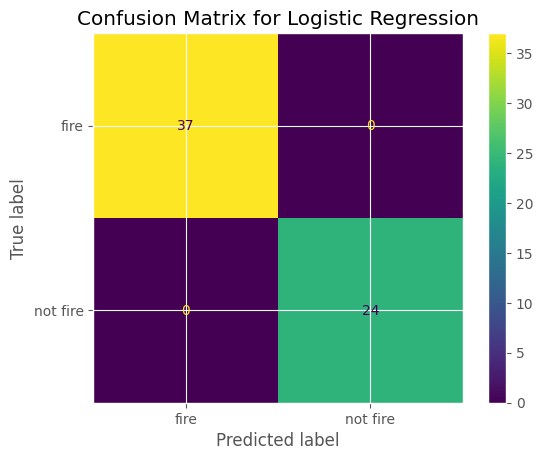


Classification Report:
              precision    recall  f1-score   support

        fire       1.00      1.00      1.00        37
    not fire       1.00      1.00      1.00        24

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=log_reg.classes_)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#declare model
knn = KNeighborsClassifier(n_neighbors=5)

#train model
knn.fit(X_train_scaled, y_train)

#predict
y_pred = knn.predict(X_test_scaled)

In [ ]:
# Evaluation metrics for K- nearest neighbors
print("K- nearest neighbors Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label='fire'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label='fire'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='fire'):.4f}")

K- nearest neighbors Regression Performance:
Accuracy: 0.9180
Precision: 0.9444
Recall: 0.9189
F1 Score: 0.9315


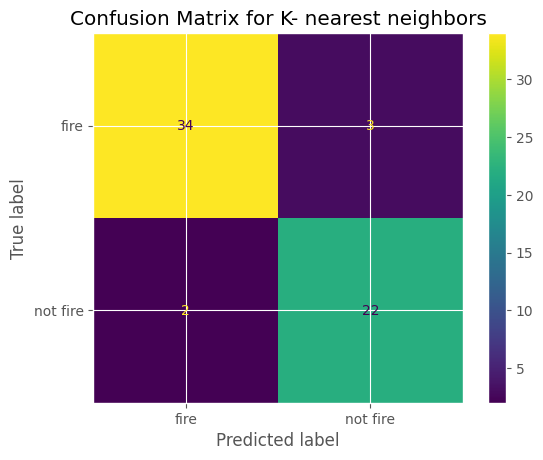


Classification Report:
              precision    recall  f1-score   support

        fire       0.94      0.92      0.93        37
    not fire       0.88      0.92      0.90        24

    accuracy                           0.92        61
   macro avg       0.91      0.92      0.91        61
weighted avg       0.92      0.92      0.92        61



In [ ]:
# Confusion Matrix for K- nearest neighbors
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=log_reg.classes_)
disp.plot()
plt.title('Confusion Matrix for K- nearest neighbors')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB

#declares the guassian Naive Bayes model
NB = GaussianNB()

#trains the model
NB.fit(X_train_scaled, y_train)

#runs our prediction
y_pred = NB.predict(X_test_scaled)

In [ ]:
# Evaluation metrics for Gaussian Naive Bayes
print("K- nearest neighbors Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label='fire'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label='fire'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='fire'):.4f}")

K- nearest neighbors Regression Performance:
Accuracy: 0.9344
Precision: 0.9459
Recall: 0.9459
F1 Score: 0.9459


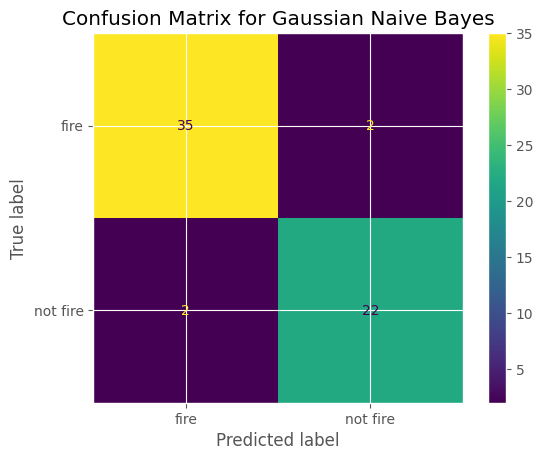


Classification Report:
              precision    recall  f1-score   support

        fire       0.95      0.95      0.95        37
    not fire       0.92      0.92      0.92        24

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



In [ ]:
# Confusion Matrix for Gaussian Naive Bayes
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=log_reg.classes_)
disp.plot()
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

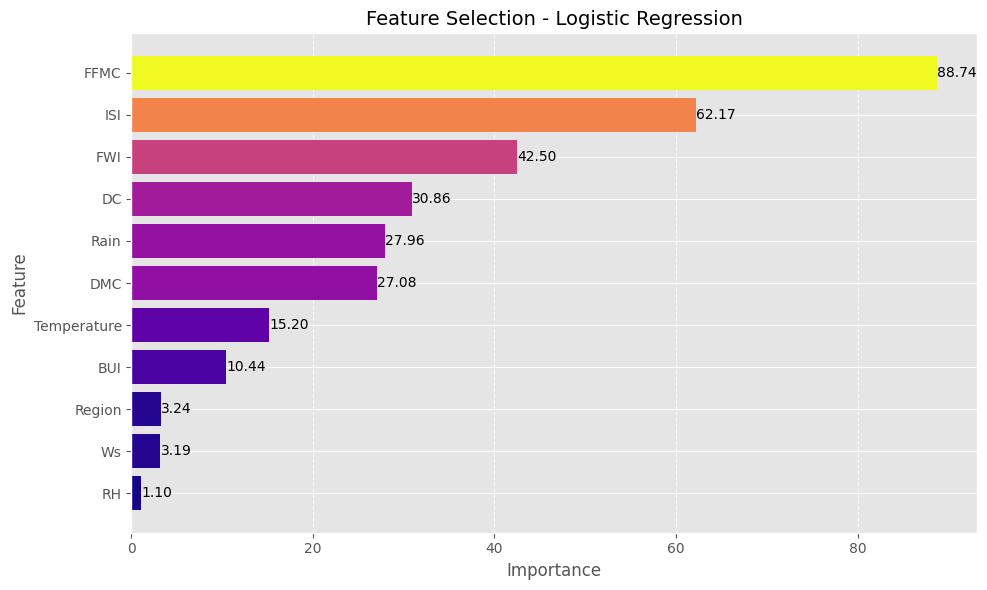

In [ ]:


# Feature importance
feature_importance = abs(log_reg.coef_[0])
feature_names = X.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Color map based on importance
colors = plt.cm.plasma (feature_importance_df['Importance'] / max(feature_importance_df['Importance']))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Selection - Logistic Regression', fontsize=14)
plt.gca().invert_yaxis()  # Highest importance at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Optional: add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

